# Diabetes Prediction Using CRIPS DM Methodology

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Kaggle's Water Patability dataset - https://www.kaggle.com/datasets/mathchi/diabetes-data-set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
import pandas as pd
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Understanding The Data

In [ ]:
# Display the summary statistics of the dataset
summary_stats = diabetes_df.describe()
summary_stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check for missing values in the dataset
missing_values = diabetes_df.isnull().sum()

missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

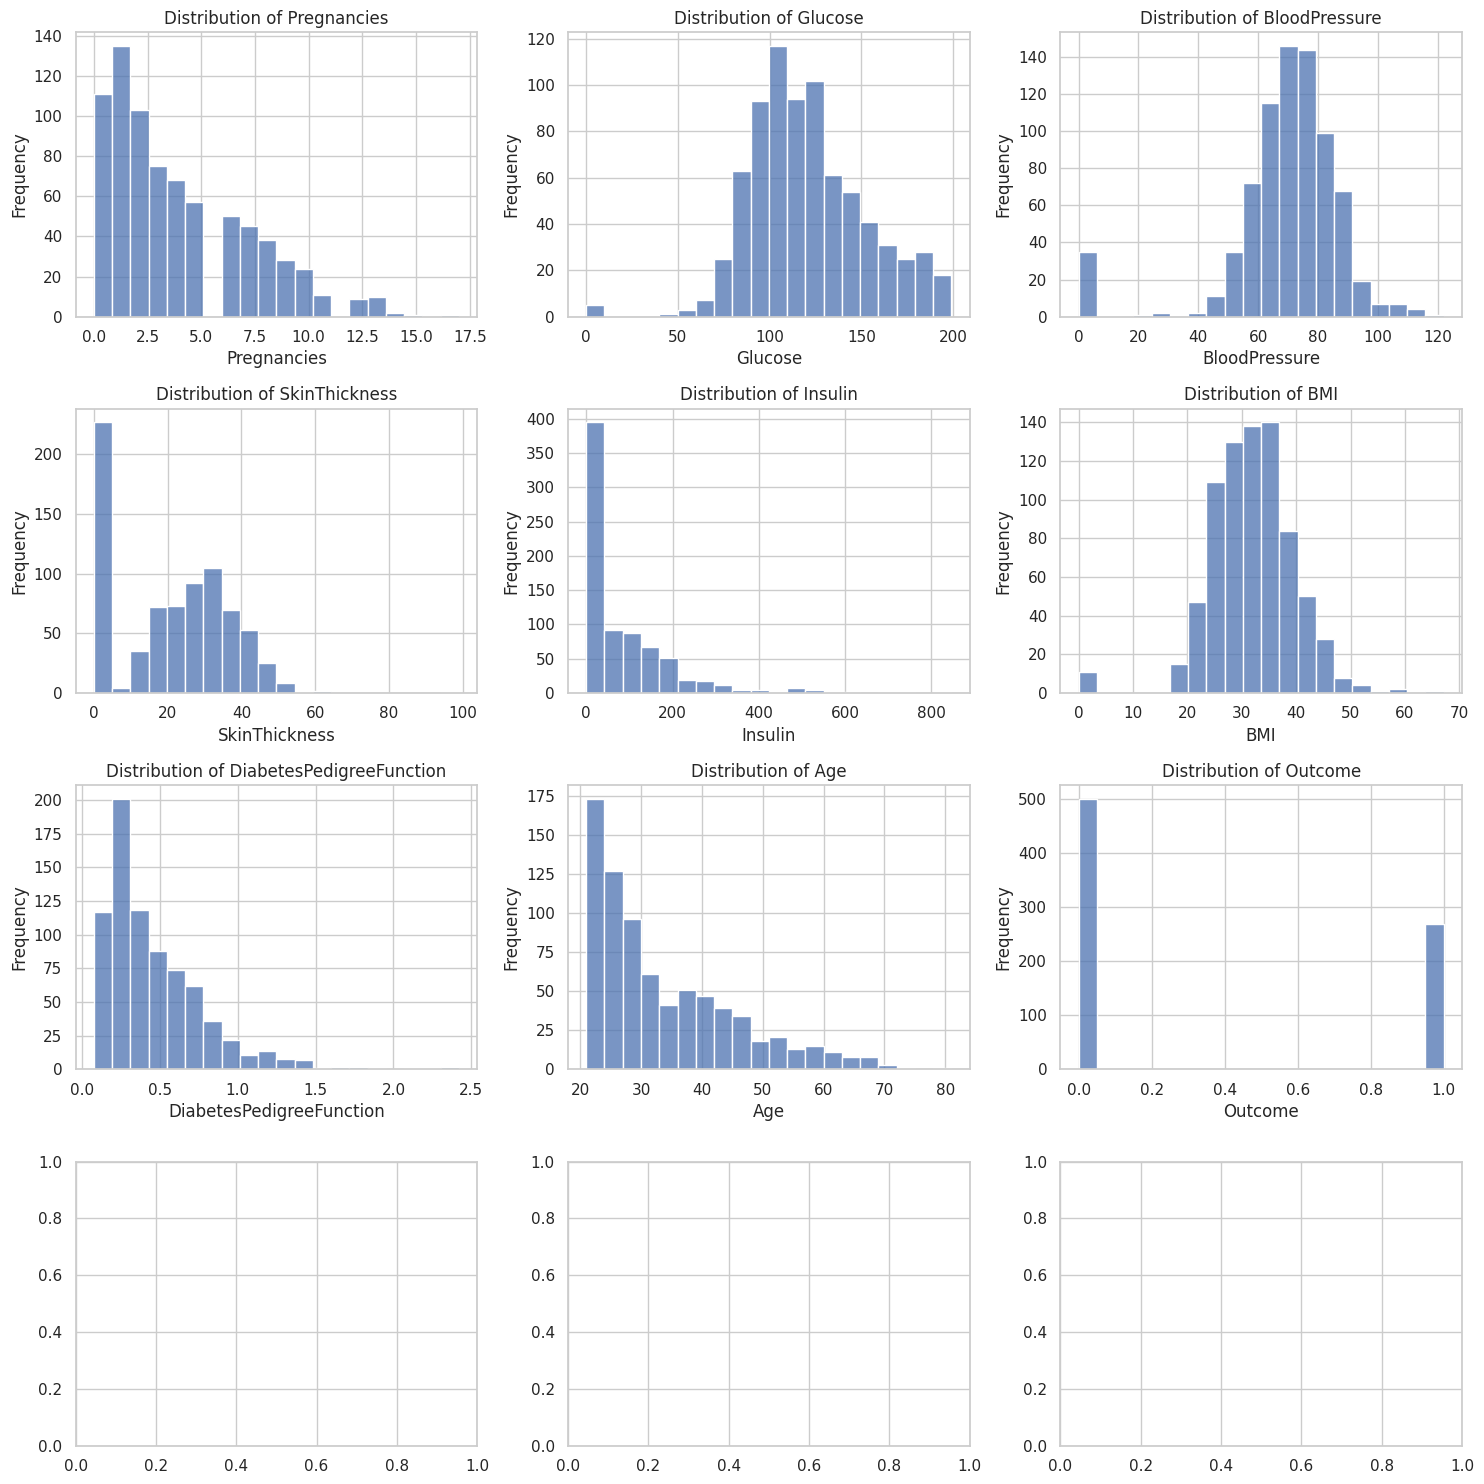

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Define the number of subplots along the grid row
n_cols = 3

# Define the number of subplots along the grid column
n_rows = int(len(diabetes_df.columns) / n_cols) + 1

# Initialize the subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Flatten the axes
axs = axs.flatten()

# Iterate over each column and plot the distribution
for i, col in enumerate(diabetes_df.columns):
    sns.histplot(diabetes_df[col], kde=False, ax=axs[i], bins=20)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()


## Handling the Missing Values

In [ ]:
import numpy as np

# List of columns to check for missing or incorrect entries (zeros)
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN in the specified columns
diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].replace(0, np.nan)

# Display the number of missing values in each column
missing_values_after_replacement = diabetes_df.isnull().sum()
missing_values_after_replacement


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Impute missing values with the median of the respective columns
diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].apply(lambda x: x.fillna(x.median()), axis=0)

# Check again for any remaining missing values
remaining_missing_values = diabetes_df.isnull().sum()
remaining_missing_values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the features and target variable
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Scale the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Display the first few rows of scaled features
X_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


## Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((614, 8), (154, 8), (614,), (154,))

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_lr = lr_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display the evaluation metrics
(accuracy_lr, precision_lr, recall_lr, f1_lr, auc_roc_lr, conf_matrix_lr)


(0.7077922077922078,
 0.6,
 0.5,
 0.5454545454545454,
 0.66,
 array([[82, 18],
        [27, 27]]))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_dt = dt_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display the evaluation metrics
(accuracy_dt, precision_dt, recall_dt, f1_dt, auc_roc_dt, conf_matrix_dt)


(0.6818181818181818,
 0.5531914893617021,
 0.48148148148148145,
 0.5148514851485149,
 0.6357407407407407,
 array([[79, 21],
        [28, 26]]))

## Random Forest Classsifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_rf = rf_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the evaluation metrics
(accuracy_rf, precision_rf, recall_rf, f1_rf, auc_roc_rf, conf_matrix_rf)


(0.7792207792207793,
 0.7272727272727273,
 0.5925925925925926,
 0.6530612244897959,
 0.7362962962962963,
 array([[88, 12],
        [22, 32]]))

## K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier model
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_knn = knn_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_roc_knn = roc_auc_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Display the evaluation metrics
(accuracy_knn, precision_knn, recall_knn, f1_knn, auc_roc_knn, conf_matrix_knn)


(0.7532467532467533,
 0.66,
 0.6111111111111112,
 0.6346153846153846,
 0.7205555555555555,
 array([[83, 17],
        [21, 33]]))

## Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

# Initialize the Support Vector Machine Classifier model
svm_model = SVC(random_state=42, probability=True)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_svm = svm_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display the evaluation metrics
(accuracy_svm, precision_svm, recall_svm, f1_svm, auc_roc_svm, conf_matrix_svm)


(0.7337662337662337,
 0.6444444444444445,
 0.5370370370370371,
 0.585858585858586,
 0.6885185185185185,
 array([[84, 16],
        [25, 29]]))

## Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes Classifier model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred_nb = nb_model.predict(X_test)

# Calculate the evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
auc_roc_nb = roc_auc_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display the evaluation metrics
(accuracy_nb, precision_nb, recall_nb, f1_nb, auc_roc_nb, conf_matrix_nb)


(0.7012987012987013,
 0.5666666666666667,
 0.6296296296296297,
 0.5964912280701755,
 0.6848148148148149,
 array([[74, 26],
        [20, 34]]))

## Evaluation Of Models

In [ ]:
# Create a DataFrame to hold the evaluation metrics of all models
model_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_nb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_knn, precision_svm, precision_nb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_knn, recall_svm, recall_nb],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_knn, f1_svm, f1_nb],
    'AUC-ROC Score': [auc_roc_lr, auc_roc_dt, auc_roc_rf, auc_roc_knn, auc_roc_svm, auc_roc_nb]
})

# Display the model summary sorted by AUC-ROC Score in descending order
model_summary.sort_values(by='AUC-ROC Score', ascending=False).reset_index(drop=True)


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC Score
0,Random Forest,0.779221,0.727273,0.592593,0.653061,0.736296
1,K-Nearest Neighbors,0.753247,0.660000,0.611111,0.634615,0.720556
2,Support Vector Machine,0.733766,0.644444,0.537037,0.585859,0.688519
3,Naive Bayes,0.701299,0.566667,0.629630,0.596491,0.684815
4,Logistic Regression,0.707792,0.600000,0.500000,0.545455,0.660000
5,Decision Tree,0.681818,0.553191,0.481481,0.514851,0.635741


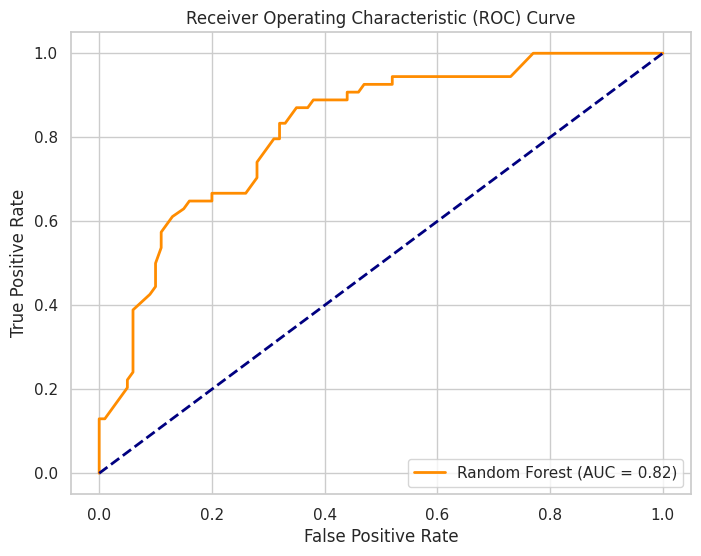

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display the detailed classification report
classification_report_rf = classification_report(y_test, y_pred_rf)
print(classification_report_rf)


## Feature Importance

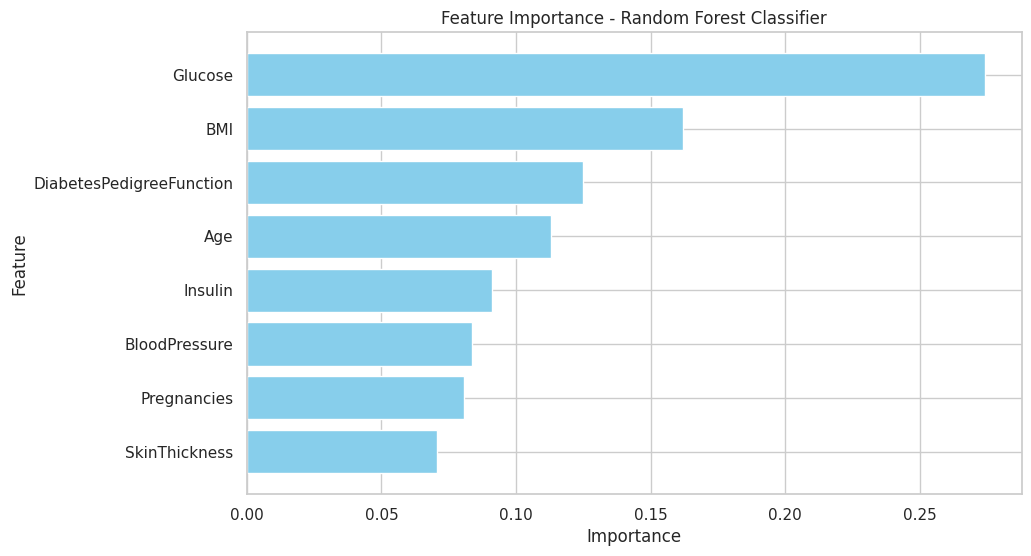

,Feature,Importance
1,Glucose,0.274086
5,BMI,0.161903
6,DiabetesPedigreeFunction,0.125020
7,Age,0.112985
4,Insulin,0.091224
2,BloodPressure,0.083518
0,Pregnancies,0.080795
3,SkinThickness,0.070468


In [ ]:
# Get the feature importances from the Random Forest model
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest Classifier')
plt.gca().invert_yaxis()  # Display the highest importance at the top
plt.show()

# Return the sorted feature importances
feature_importances_df


## Training the Model on Entire Dataset

In [ ]:
# Retrain the Random Forest model on the entire dataset
final_rf_model = RandomForestClassifier(random_state=42)
final_rf_model.fit(X_scaled, y)

# Check if the model has been retrained successfully
final_rf_model_trained = final_rf_model.fit_status_ == 0 if hasattr(final_rf_model, 'fit_status_') else True
final_rf_model_trained

True

## Exporting the Model

In [ ]:
import joblib
joblib.dump(final_rf_model, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']